In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import fastai
from fastai import *
from fastai.vision import *
# from fastai.tabular import *

In [4]:
path = untar_data(URLs.CIFAR); path

PosixPath('/home/beehollander/.fastai/data/cifar10')

In [5]:
path.ls()

['train', 'test', 'labels.txt', 'models']

In [6]:
!cat ~/.fastai/data/cifar10/labels.txt

airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck


In [7]:
classes = pd.read_csv(path/'labels.txt')

In [8]:
classes

,airplane
0,automobile
1,bird
2,cat
3,deer
4,dog
5,frog
6,horse
7,ship
8,truck


In [9]:
train_ds, valid_ds = ImageClassificationDataset.from_folder(path/'train', valid_pct=0.2)

In [10]:
valid_ds

ImageClassificationDataset of len 10000

In [11]:
train_ds

ImageClassificationDataset of len 40000

In [12]:
test_ds = ImageClassificationDataset.from_folder(path/'test', valid_pct=0)

In [13]:
test_ds

ImageClassificationDataset of len 10000

In [14]:
data = ImageDataBunch.create(train_ds=train_ds,\
                             valid_ds=valid_ds,\
                             test_ds=test_ds,\
                             path=path,\
                             ds_tfms=get_transforms(),\
                             size=224)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


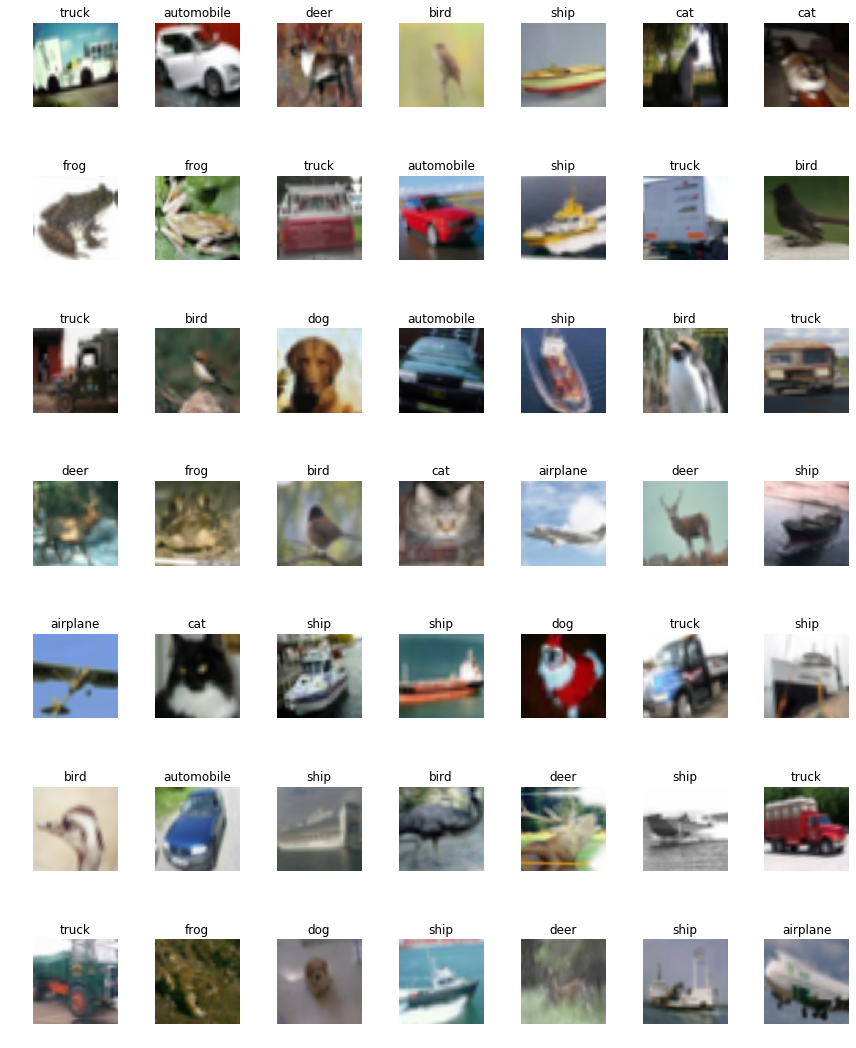

In [15]:
data.show_batch(rows=7)

In [16]:
cifar_stats = ([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])

In [17]:
data.normalize(cifar_stats)

In [18]:
data.c

10

In [19]:
data.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [20]:
learn = ConvLearner(data, models.resnet34, metrics=error_rate)

In [21]:
# learn.fit_one_cycle(4)

In [22]:
# learn.save('first-pass')

In [23]:
learn.load('first-pass')

In [24]:
learn.lr_find()

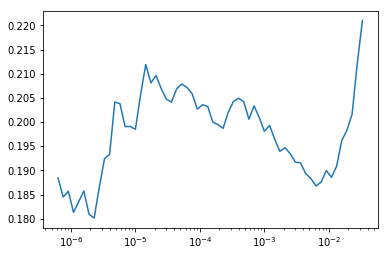

In [30]:
learn.recorder.plot()

In [31]:
learn.unfreeze()

In [42]:
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-2))

Total time: 13:17
epoch  train loss  valid loss  error_rate
1      0.253128    0.154198    0.051600    (06:38)
2      0.106773    0.105505    0.035400    (06:38)



In [33]:
interp = ClassificationInterpretation.from_learner(learn)

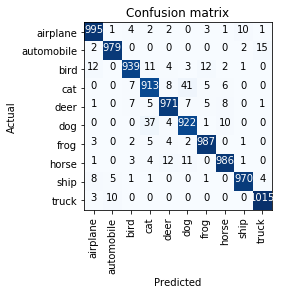

In [34]:
interp.plot_confusion_matrix()

In [36]:
interp.most_confused(min_val=3)

[('cat', 'dog', 41),
 ('dog', 'cat', 37),
 ('automobile', 'truck', 15),
 ('bird', 'airplane', 12),
 ('bird', 'frog', 12),
 ('horse', 'deer', 12),
 ('bird', 'cat', 11),
 ('horse', 'dog', 11),
 ('airplane', 'ship', 10),
 ('dog', 'horse', 10),
 ('truck', 'automobile', 10),
 ('cat', 'deer', 8),
 ('deer', 'horse', 8),
 ('ship', 'airplane', 8),
 ('cat', 'bird', 7),
 ('deer', 'bird', 7),
 ('deer', 'dog', 7),
 ('cat', 'horse', 6),
 ('cat', 'frog', 5),
 ('deer', 'cat', 5),
 ('deer', 'frog', 5),
 ('frog', 'cat', 5),
 ('ship', 'automobile', 5),
 ('airplane', 'bird', 4),
 ('bird', 'deer', 4),
 ('dog', 'deer', 4),
 ('frog', 'deer', 4),
 ('horse', 'cat', 4),
 ('ship', 'truck', 4)]

In [ ]:
interp.

In [41]:
doc(interp.plot_top_losses)

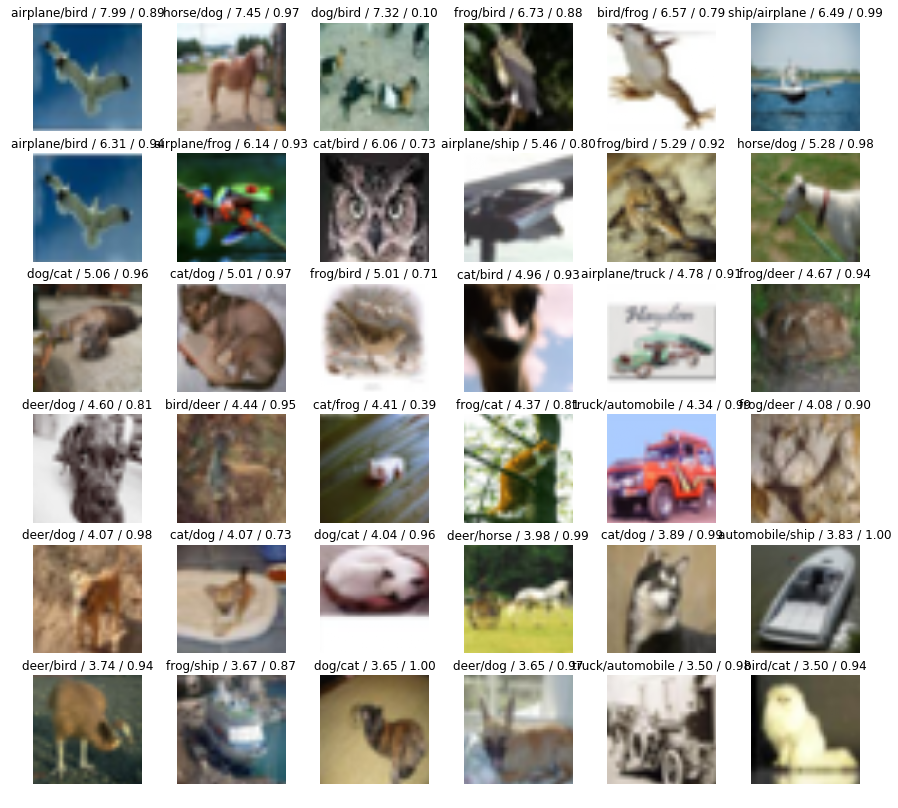

In [40]:
interp.plot_top_losses(36, figsize=(15,14))